# PCABaseline

Hi, this notebook is designed just for the experiment of applying PCA into the dataset. In order to obtain a meaningful result, one must consider more dense feature engineering, data transformation etc.

In [1]:
# Importing libraries

import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Show all the files

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/playground-series-s3e20/sample_submission.csv
/kaggle/input/playground-series-s3e20/train.csv
/kaggle/input/playground-series-s3e20/test.csv


In [2]:
# Importing the files
train = pd.read_csv("/kaggle/input/playground-series-s3e20/train.csv")
                    
test = pd.read_csv("/kaggle/input/playground-series-s3e20/test.csv")
                   
sumbission = pd.read_csv("/kaggle/input/playground-series-s3e20/sample_submission.csv")                 

In [3]:
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


## Model for the original dataset

In [4]:
train_org_dataset = train.drop(["ID_LAT_LON_YEAR_WEEK","latitude","longitude","year","week_no"],axis=1)


In [5]:
# Defining X and y for the model part, and train and test split
X = train_org_dataset.drop("emission",axis = 1).fillna(0)

y = train_org_dataset.emission

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 49)

In [6]:
# Building Random Forest Regression Model
clf = RandomForestRegressor(random_state = 49, n_jobs=-1)

# Fit the data
clf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=49)

In [7]:
# Making predictions
y_pred_org = clf.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE Score: {mean_squared_error(y_test, y_pred_org, squared=False)}') 

RMSE Score: 145.50576840625794


## Scaling and PCA

In [8]:
# Converting index into ID_LAT_LON_YEAR_WEEK in order to keep the location and week information 
train.index = train["ID_LAT_LON_YEAR_WEEK"]

# Define dftrainemission to keep the emission values in train
emission = train[["emission"]]

# Deleting irrevelant columns
dftrain = train.drop(["ID_LAT_LON_YEAR_WEEK","latitude","longitude","year","week_no","emission"],axis=1)

# Filling empty cells with 0
dftrain.fillna(0,inplace=True)

In [9]:
# Defining the scaler method in order to prepare the data to be fed into PCA
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(dftrain)

In [10]:
scaled_data.shape

(79023, 70)

In [11]:
# Defining PCA without specifying n_components 
pca = PCA(n_components=None)

# Fit and transform the data
pca_train = pca.fit_transform(scaled_data)

In [12]:
# Defining cross validation score to find the optimal paramter
scores = cross_val_score(pca, scaled_data, emission, cv=5)

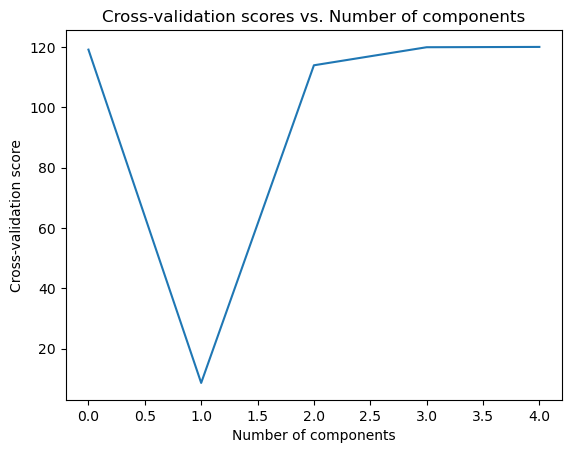

In [13]:
# Plotting the CV scores vs. Number of components to detect the optimal value for n_component
plt.plot(range(0, len(scores)), scores)
plt.xlabel('Number of components')
plt.ylabel('Cross-validation score')
plt.title('Cross-validation scores vs. Number of components')
plt.show()

In [14]:
# As seen in the graph, the optimal component is 2(3 might be also a choice but it looks like 2 is enough)
pca_optimal = PCA(n_components=2)

#Fit and transform the data
pca_train_optimal  = pca_optimal.fit_transform(scaled_data)

In [15]:
pca_train_optimal.shape

(79023, 2)

#### Now, we transformed our features into two features with the help of PCA

## Model for normalized dataset with reduced dimensions

In [16]:
# Defining df_train as our new train set
train_PCA = pd.DataFrame({"feature1":pca_train_optimal[:,0],"feature2":pca_train_optimal[:,1],"emission":emission["emission"]})

In [17]:
# Defining X and y for the model part, and train and test split
X = train_PCA.drop("emission",axis = 1).fillna(0)

y = train_PCA.emission

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 49)

In [18]:
# Building Random Forest Regression Model
clf = RandomForestRegressor(random_state = 49, n_jobs=-1)

# Fit the data
clf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=49)

In [19]:
# Making predictions
pred_PCA = clf.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE Score: {mean_squared_error(y_test, pred_PCA, squared=False)}') 

RMSE Score: 156.327949218351


As seen from the MSE scores, applying PCA to the dataset did not improve the model built with original dataset as expected, but the MSE difference between two models is not so significant. Therefore, by reducing feature dimensions into 2, not so much of information are lost, which is the beauty of PCA.